# 22.46 Procesamiento Adaptativo de Señales Aleatorias
# Proyecto 02
## Cancelación Activa de Ruido
Este trabajo desarrolla la síntesis de un sistema de cancelación activa de ruido basado en el algoritmo RLS, utilizando un enfoque donde sólo se busca modelar (de forma adaptativa) el camino acústico primario $P(z)$.

#### Grupo N° 1
* DAVIDOV, Gonzalo Joaquín
* FARALL, Facundo David
* KAMMANN, Lucas Agustín
* TROZZO, Rafael Nicolás

In [83]:
import importlib

In [84]:
import test_model
importlib.reload(test_model);

In [85]:
import anc_complete
importlib.reload(anc_complete);

In [86]:
import plot_helpers
importlib.reload(plot_helpers);

In [87]:
import boseqc20_model
importlib.reload(boseqc20_model);

In [88]:
import numpy as np

In [89]:
import matplotlib.pyplot as plt

# Caso #1

In [206]:
N = 100000 # Quantity of samples used for the simulation
variance = 1 # Variance of the white noise
x = np.random.normal(size=N, scale=np.sqrt(variance)) # Gaussian white noise

In [207]:
headphone = boseqc20_model.BoseQC20('../support/dataset/BoseQC20.json', secondary_enable=True, feedback_enable=True) # Create testbench model
headphone.set_noise(x) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant
forget = 0.999 # Forget parameter
order = 200 # Order of the filter
e1, w1, l1, pnorm1 = anc_complete.anc_complete(headphone, headphone.g, headphone.f, order=order, forget=forget, delta=50, p_normalization=False, force_hermitian=True, lambda_history=True, p_norm_history=True)

Took 73.77351832389832 seconds
Propagation: 0.0 %
Algorithm: 0.001 %
Update: 0.0 %


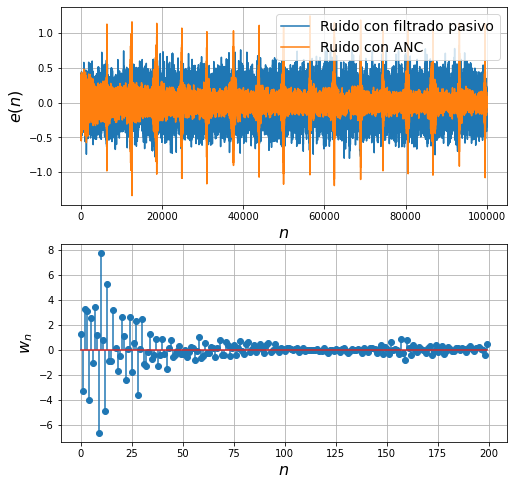

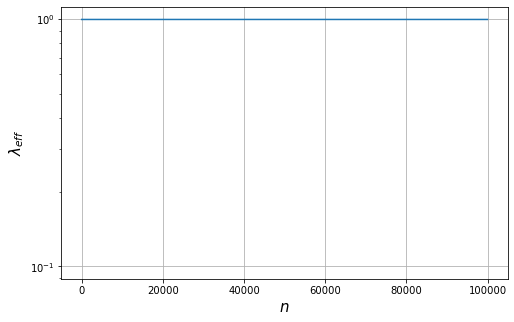

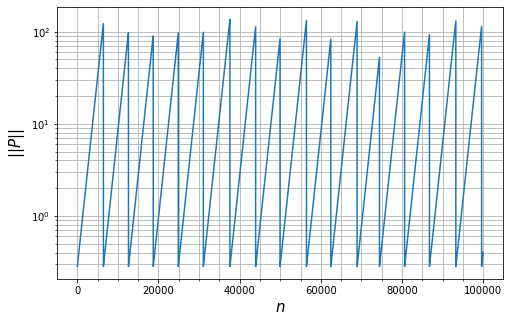

In [208]:
since = 0
until = 100000

plot_helpers.plot_anc_results([headphone.d[since:until], e1[since:until]], w1, weight_plot='response')

plt.figure(figsize=(8, 5))
plt.semilogy(l1[since:until])
plt.xlabel('$n$', fontsize=15)
plt.ylabel('$\lambda_{eff}$', fontsize=15)
plt.grid()

plt.figure(figsize=(8, 5))
plt.semilogy(pnorm1[since:until])
plt.xlabel('$n$', fontsize=15)
plt.ylabel('$||P||$', fontsize=15)
plt.minorticks_on()
plt.grid(which='both')

# Caso #2